In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Comparison ##

Let's look at some basic comparisons:

In [2]:
3 > 1

True

In [3]:
3 < 1

False

In [4]:
3 == 3

True

What does `3 <= 3` evaluate to?

In [5]:
3 <= 3

True

What does `3 < 3` evaluate to?

In [6]:
3 < 3

False

What does `3 != 3` evaluate to?

In [7]:
3 != 3

False

Comparisons return a value of `True` or `False`, which are *Boolean* values:

In [8]:
type(True)

bool

In [9]:
type(False)

bool

In [10]:
type(3 > 1)

bool

In [11]:
# The values True and False are case-sensitive
true

NameError: name 'true' is not defined

In [ ]:
# True and False are not strings!

In [12]:
'True' == True

False

We can also compare some non-numeric values, like strings:

In [14]:
'Rat' != 'Mouse'

True

In [15]:
# What is this true?
'Capybara' > 'Beaver'

True

When checking for equality, we use two equal signs `==` instead of one equal sign `=`:

In [17]:
3 == 4

False

Remember that `=` is already used in Python to assign values to variables, so `3 = 4` will try to overwrite the value of `3`. Fortunately, Python does not allow this!

In [ ]:
3 == 4

We can compare the values of ints and floats:

In [18]:
type(3)

int

In [19]:
type(3.0)

float

In [20]:
3 == 3.0

True

In [21]:
3 == 3.0000000001

False

Python has limited numerical precision:

In [22]:
3 == 3.0000000000000001
# floating point error in python, 15-16 decimal places saved in memory 

True

**Question:** let's define some variables:

In [23]:
x = 14
y = 3

What does `x > 15` return? How about `x > y`?

In [24]:
x > 15

False

In [25]:
x > y

True

## Combining comparisons

We can also check several comparisons simultaneously:

In [26]:
12 < x < 20

True

In [27]:
10 < x-y < 13

True

In [28]:
1 < 2 < 3 < 4 <= 5 <= 6 != 7

True

In [29]:
# The expression is True if and only if every single comparison is True.
# Why is this expression False?
1 < 2 < 3 < 4 <= 5 <= 6 != 7 > 8

False

## Comparisons with arrays

In [30]:
# Compare with a single value...
make_array(1, 2, 3, 4, 5) >= 3

array([False, False,  True,  True,  True], dtype=bool)

In [31]:
# ...or compare multiple values
x = make_array(1, 2, 3, 4, 5)
y = make_array(5, 4, 3, 2, 1)
x == y

array([False, False,  True, False, False], dtype=bool)

In [32]:
# We can only compare two arrays with the same length:
x > make_array(3, 4, 5)

ValueError: operands could not be broadcast together with shapes (5,) (3,) 

Summing an array or list of `bool` values will count the number of `True` values:

In [33]:
sum(make_array(True, True, False, False, False))

2

In [34]:
True + True + True + False

3

In [35]:
sum(x == y)

1

**Question:** how many capybars are in this array of rodents?

In [36]:
rodents = make_array('capybara', 'guinea pig', 'beaver', 'mouse', 'rat', 'guinea pig', 'mouse', 
           'guinea pig', 'hamster', 'hamster', 'guinea pig', 'beaver', 'mouse', 'hamster', 
           'mouse', 'guinea pig', 'guinea pig', 'hamster', 'mouse', 'capybara', 'capybara', 
           'mouse', 'marmot', 'capybara', 'mouse', 'marmot', 'capybara', 'guinea pig', 'beaver', 
           'beaver', 'marmot', 'marmot', 'capybara', 'hamster', 'beaver', 'hamster', 'hamster', 
           'capybara', 'beaver', 'hamster', 'mouse', 'capybara', 'guinea pig', 'capybara', 'capybara', 
           'mouse', 'marmot', 'beaver', 'rat', 'guinea pig', 'guinea pig', 'hamster')

In [40]:
where_rodent_is_capy = rodents == 'capybara'
sum(where_rodent_is_capy)

10

In [37]:
sum(rodents == 'capybara')

10

## `If` Statements

`If` statements are often used in functions to change behavior based on the value of the arguments. Here is a simple example:

In [42]:
def sign(x):
    if x > 0:
        return "positive"
    elif x < 0:
        return "negative"
    else:
        return "zero"

In [43]:
sign(1)

'positive'

In [44]:
sign(-1)

'negative'

In [45]:
sign(0)

'zero'

Here is another example:

In [46]:
def federal_income_tax(income): 
    """
    Calculate 2022 federal income tax for single filers.
    """
    if income < 0:
        return 0.0
    elif income < 10275:
        return 0.1 * income 
    elif income < 41775:
        return 1027.50 + 0.12 * (income - 10275)
    elif income < 89075:
        return 4807.50 + 0.22 * (income - 41775)
    elif income < 170050:
        return 15213.50 + 0.24 * (income - 89075)
    elif income < 215951:
        return 34647.50 + 0.32 * (income - 170050)
    elif income < 539900:
        return 49335.50 + 0.35 * (income - 215950)
    else:
        return 162718 + 0.37 * (income - 539900)

In [47]:
federal_income_tax(50000)

6617.0

taxable income,federal income tax
0,0
10,1
20,2
30,3
40,4


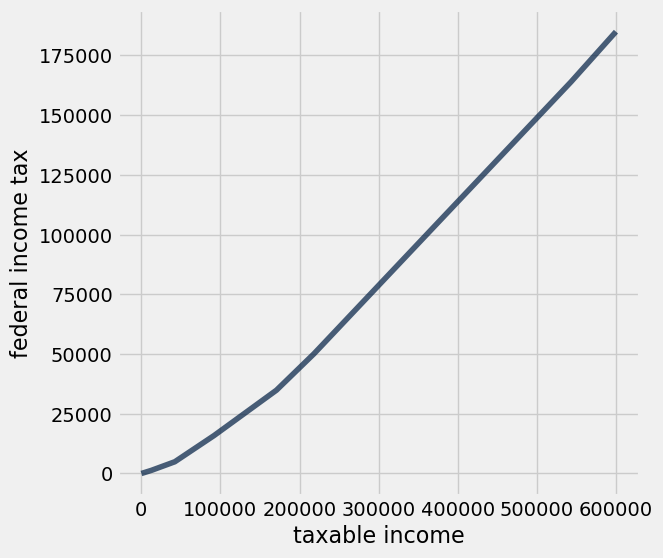

In [48]:
# Use the apply method to calculate taxes for various taxable incomes between 0 and $600000
incomes_array = np.arange(0, 600000, 10)
incomes_table = Table().with_column('taxable income', incomes_array)
incomes_table = incomes_table.with_column(
    'federal income tax',
    incomes_table.apply(federal_income_tax, 'taxable income'))
incomes_table.show(5)

# Plot
incomes_table.plot('taxable income')

Here is a complicated example:

In [50]:
def rock_paper_scissors(player1, player2):
    """
    Evaluate a game of rock-paper-scissors.
    Each player must provide a string 'rock', 'paper', or 'scissors'.
    """
    
    # First clause of the outer if statement
    if player1 == 'rock':
        
        # If player1 plays 'rock', then we evaluate this inner if statement:
        if player2 == 'rock':
            return "It's a draw!"
        elif player2 == 'paper':
            return "Player 2 wins!"
        elif player2 == 'scissors':
            return "Player 1 wins!"
        else:
            return 'Player 2 gave an invalid value "' + str(player2) + '"'
    
    # Second clause of the outer if statement
    elif player1 == 'paper':
        
        # If player1 plays 'paper', then we evaluate this inner if statement:
        if player2 == 'paper':
            return "It's a draw!"
        elif player2 == 'scissors':
            return "Player 2 wins!"
        elif player2 == 'rock':
            return "Player 1 wins!"
        else:
            return 'Player 2 gave an invalid value "' + str(player2) + '"'
        
    # Third clause of the outer if statement
    elif player1 == 'scissors':
        
        # If player1 plays 'scissors', then we evaluate this inner if statement:
        if player2 == 'scissors':
            return "It's a draw!"
        elif player2 == 'rock':
            return "Player 2 wins!"
        elif player2 == 'paper':
            return "Player 1 wins!"
        else:
            return 'Player 2 gave an invalid value "' + str(player2) + '"'
        
    # Final clause of the outer if statement
    # If Python gets here, then the value of player1 is neither 'rock', 'paper', nor 'scissors',
    # so they must have provided an invalid value.
    else:
        return 'Player 1 gave an invalid value "' + str(player1) + '"'

In [51]:
rock_paper_scissors('rock', 'paper')

'Player 2 wins!'

In [52]:
rock_paper_scissors('scissors', 'paper')

'Player 1 wins!'

In [53]:
rock_paper_scissors('paper', 'chainsaw')

'Player 2 gave an invalid value "chainsaw"'

Make sure to indent properly!

In [57]:
def bad_sign(x):
    if x > 0:
        return 'positive' # everything to be executed when x > 0 should be indented
    elif x < 0:
        return 'negative' # this line is also missing an indent
    else:
        return 'zero' # this line is also missing an indent

**Discussion Question:** suppose we want to bin a dataset by placing values into the bins $[0, 1)$, $[1, 2)$, and $[2, 3]$. For example, the number 1 would belong to the $[1, 2)$ bin. Write a function called `bin_data` that takes a single argument `x`. If `x` belongs to one of the three bins, return the left edge of that bin (e.g., if `x = 0.5`, we would return `0`). Otherwise, return the string `"None"`.

In [58]:
def bin_data(x):
    """
    If x is in the [0, 1) bin, return 0
    If x is in the [1, 2) bin, return 1
    If x is in the [2, 3] bin, return 2
    Otherwise, return "None"
    """
    if 0 <= x < 1:
        return 0
    elif 1 <= x < 2:
        return 1
    elif 2 <= x <= 3:
        return 2
    else:
        return "None"

In [59]:
bin_data(0.5)

0

In [60]:
bin_data(10)

'None'

## `For` Loops

`for` loops allow us to iterate over arrays or lists, performing a set of instructions for each value in the sequence:

In [61]:
pet_array = make_array('mouse', 'capybara', 'marmot')

for pet in pet_array:
    message = 'I love my ' + pet
    print(message)

I love my mouse
I love my capybara
I love my marmot


In [62]:
pet = pet_array.item(0)
message = 'I love my ' + pet
print(message)

pet = pet_array.item(1)
message = 'I love my ' + pet
print(message)

pet = pet_array.item(2)
message = 'I love my ' + pet
print(message)

I love my mouse
I love my capybara
I love my marmot


Here's another example, which iterates over a list instead of an array:

In [65]:
for number in [1, 2, 3, 4, 5, 6]:
    if number < 3:
        print('The number ' + str(number) + ' is less than 3')

The number 1 is less than 3
The number 2 is less than 3


**Question:** how can I print out every integer between 5 and 10 (inclusive)?

In [66]:
for number in np.arange(5, 11):
    print(number)

5
6
7
8
9
10


## Appending Arrays

Usually when we use `for` loops, we would like to calculate and store some value each iteration---not just print it out. The `np.append` function will let us add a value (or values) to an existing array.

In [67]:
# Define two arrays
first = np.arange(4)
second = np.arange(10, 17)

In [68]:
first

array([0, 1, 2, 3])

In [69]:
second

array([10, 11, 12, 13, 14, 15, 16])

In [70]:
# Add a single value to the first array
np.append(first, 4)

array([0, 1, 2, 3, 4])

In [71]:
# Append doesn't modify the array itself! 
# It returns a new array with the extra value added.
first

array([0, 1, 2, 3])

In [72]:
first = np.append(first, 4)

In [73]:
first

array([0, 1, 2, 3, 4])

In [74]:
# We can also use append to combine two arrays together
np.append(first, second)

array([ 0,  1,  2,  3,  4, 10, 11, 12, 13, 14, 15, 16])

We can use the `np.append` function inside of a `for` loop to construct an array on element at a time. For example, suppose we want to calculate the absolute values of some numbers:

In [75]:
numbers = make_array(-1.5, 3.5, 2.5, 0.5, -2.0, -4.0)

We can first create an empty array using `make_array()`, and then use a `for` loop to append the absolute values on at a time.

In [78]:
abs_vals = make_array() # Create an empty array
abs_vals

array([], dtype=float64)

In [79]:
for number in numbers: # Iterate over each number in the array
    abs_vals = np.append(abs_vals, abs(number)) # Append the absolute value to the abs_vals array
    print(len(abs_vals))
    
abs_vals

1
2
3
4
5
6


array([ 1.5,  3.5,  2.5,  0.5,  2. ,  4. ])

**Question:** Below is a list of taxable incomes. Using a `for` loop, create an array called `taxes` that contains the amount of federal income tax each of these individuals must pay.

In [80]:
incomes = [50000, 23000, 575500]

In [82]:
taxes = make_array()
for number in incomes:
    taxes = np.append(taxes, federal_income_tax(number))
    
taxes

array([   6617. ,    2554.5,  175890. ])

## Warming Up with Simulations: A Preview of Next Week

We can use the `np.random.choice` function to randomly select entries from an array. Let's take a look:

In [83]:
mornings = make_array('wake up', 'sleep in')
mornings

array(['wake up', 'sleep in'],
      dtype='<U8')

In [95]:
np.random.choice(mornings)

'wake up'

In [100]:
# Make one random choice for each day of the week
np.random.choice(mornings, 7)

array(['sleep in', 'wake up', 'wake up', 'wake up', 'sleep in', 'wake up',
       'wake up'],
      dtype='<U8')

In [ ]:
sum(np.random.choice(mornings, 7) == 'wake up')

In [111]:
morning_week = np.random.choice(mornings, 7)
morning_week

array(['sleep in', 'wake up', 'wake up', 'wake up', 'sleep in', 'sleep in',
       'wake up'],
      dtype='<U8')

In [116]:
morning_week

array(['sleep in', 'wake up', 'wake up', 'wake up', 'sleep in', 'sleep in',
       'wake up'],
      dtype='<U8')

In [117]:
def roll_a_die(d):
    """
    Roll a die with d sides.
    """
    die_faces = np.arange(1, d + 1)
    return np.random.choice(die_faces)

In [126]:
roll_a_die(20)

20

### Example: Simulating Rock-Paper-Scissors

Simulate 100 games of rock-paper-scissors, with each player making random plays each round:

In [127]:
num_games = 100
plays = ['rock', 'paper', 'scissors']
player1_moves = np.random.choice(plays, num_games) # randomly pick player 1's moves
player2_moves = np.random.choice(plays, num_games) # randomly pick player 2's moves

player1_moves

array(['paper', 'rock', 'scissors', 'rock', 'paper', 'scissors', 'paper',
       'scissors', 'paper', 'scissors', 'paper', 'rock', 'scissors',
       'scissors', 'scissors', 'rock', 'scissors', 'scissors', 'scissors',
       'paper', 'paper', 'scissors', 'rock', 'rock', 'rock', 'scissors',
       'rock', 'paper', 'rock', 'rock', 'scissors', 'scissors', 'scissors',
       'rock', 'paper', 'rock', 'scissors', 'paper', 'rock', 'paper',
       'scissors', 'rock', 'paper', 'rock', 'paper', 'paper', 'scissors',
       'paper', 'paper', 'rock', 'paper', 'paper', 'paper', 'scissors',
       'rock', 'paper', 'rock', 'rock', 'scissors', 'rock', 'scissors',
       'scissors', 'paper', 'rock', 'scissors', 'paper', 'rock', 'paper',
       'rock', 'paper', 'paper', 'paper', 'scissors', 'paper', 'rock',
       'paper', 'scissors', 'paper', 'paper', 'rock', 'scissors', 'rock',
       'paper', 'paper', 'rock', 'rock', 'rock', 'scissors', 'paper',
       'scissors', 'scissors', 'scissors', 'scissors', '

In [128]:
player2_moves

array(['paper', 'rock', 'rock', 'paper', 'rock', 'rock', 'paper', 'rock',
       'scissors', 'paper', 'rock', 'scissors', 'scissors', 'scissors',
       'rock', 'paper', 'paper', 'rock', 'rock', 'paper', 'rock', 'rock',
       'rock', 'scissors', 'scissors', 'scissors', 'rock', 'paper',
       'scissors', 'scissors', 'paper', 'paper', 'scissors', 'scissors',
       'scissors', 'rock', 'rock', 'rock', 'rock', 'paper', 'rock',
       'scissors', 'rock', 'paper', 'scissors', 'scissors', 'scissors',
       'rock', 'scissors', 'rock', 'scissors', 'rock', 'rock', 'rock',
       'scissors', 'rock', 'paper', 'paper', 'paper', 'rock', 'scissors',
       'paper', 'paper', 'paper', 'paper', 'scissors', 'paper', 'scissors',
       'rock', 'rock', 'paper', 'scissors', 'scissors', 'paper',
       'scissors', 'rock', 'paper', 'rock', 'rock', 'paper', 'scissors',
       'scissors', 'rock', 'scissors', 'rock', 'scissors', 'scissors',
       'rock', 'paper', 'scissors', 'paper', 'rock', 'rock', 'paper',

Let's use the `rock_paper_scissors` function to determine which player wins in each of these games. There are two ways we can approach this. One is to put all the relevant data into a table, and use the `apply` method:

In [129]:
# APPROACH 1: Use the apply method
rps_games = Table().with_columns(
    'Player 1 Move', player1_moves,
    'Player 2 Move', player2_moves)
outcomes_apply = rps_games.apply(rock_paper_scissors, 'Player 1 Move', 'Player 2 Move')

Another approach is to use a `for` loop.

In [131]:
# APPROACH 2: Use a for loop
outcomes_for = make_array() # Create an empty array
for game_number in np.arange(num_games): # Iterate over game_number = 0, 1, 2, ..., 99
    
    # Use .item to look up the entries of player1_move and player2_move at the position game_number
    player1_move = player1_moves.item(game_number) 
    player2_move = player2_moves.item(game_number)
    
    # Evaluate the game
    outcome = rock_paper_scissors(player1_move, player2_move)
    
    # Append the outcome to the array
    outcomes_for = np.append(outcomes_for, outcome)

We now have two arrays, `outcomes_apply` and `outcomes_for`, which should contain the same information. Let's check that the entries of these arrays are identical:

In [132]:
# Out of the 100 entries in each of these arrays, how many are equal?
sum(outcomes_apply == outcomes_for)

100

Let's see the distribution of outcomes over 100 games:

In [133]:
rps_games = rps_games.with_column('Outcome', outcomes_apply)
rps_games

Player 1 Move,Player 2 Move,Outcome
paper,paper,It's a draw!
rock,rock,It's a draw!
scissors,rock,Player 2 wins!
rock,paper,Player 2 wins!
paper,rock,Player 1 wins!
scissors,rock,Player 2 wins!
paper,paper,It's a draw!
scissors,rock,Player 2 wins!
paper,scissors,Player 2 wins!
scissors,paper,Player 1 wins!


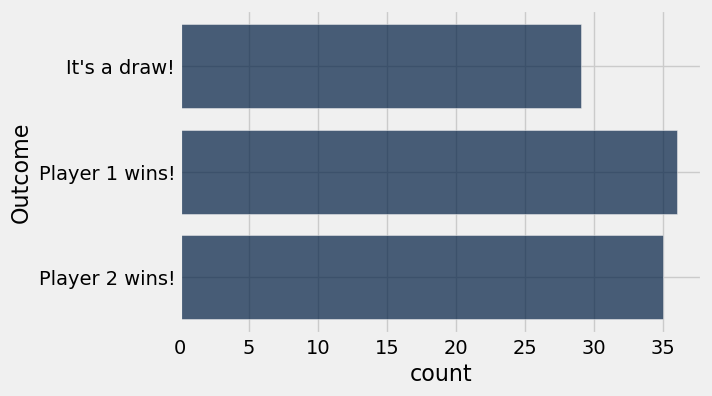

In [134]:
rps_games.group('Outcome').barh('Outcome')

Is this roughly what you would expect?

### Example: Simulating Coin Tosses

Suppose that we toss a coin 100 times. How many times do we end up with heads?

In [ ]:
coin = make_array('heads', 'tails')

In [ ]:
sum(np.random.choice(coin, 100) == 'heads')

The number of heads can vary quite widely. Let's repeat this experiment many times, and examine the distribution for the number of heads each trial.

In [ ]:
def num_heads():
    """
    Simulate 100 coin tosses and count the number of heads.
    """
    return sum(np.random.choice(coin, 100) == 'heads')

In [ ]:
# Decide how many times you want to repeat the experiment
repetitions = 10000

In [ ]:
# Simulate the outcomes
outcomes = make_array()
for i in np.arange(repetitions):
    outcomes = np.append(outcomes, num_heads())

In [ ]:
# Plot a histogram with the distribution of outcomes
heads = Table().with_column('Heads', outcomes)
heads.hist(bins = np.arange(29.5, 70.6))

In [ ]:
np.mean(outcomes)